#### Classification Tree on Balanced Dataset
#### CART Model on IRIS Data
#### Three species of iris flower setosa, versicolor, virginica

In [26]:
from sklearn.datasets import load_iris
iris = load_iris()

#### Get the Features and Labels

In [27]:
print(iris.feature_names)
print(iris.target_names)
print(iris.target)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [28]:
type(iris.data)


numpy.ndarray

In [29]:
print(iris.data)

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

In [30]:
X = iris.data
y = iris.target

In [31]:
type(X)
type (y)

numpy.ndarray

#### create training and testing vars

In [32]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
        X,y,test_size=50,
        random_state = 42)

In [33]:
print(X_train.shape, y_train.shape)


(100, 4) (100,)


In [34]:
print(X_test.shape, y_test.shape)

(50, 4) (50,)


In [35]:
import numpy as np
y_freq = np.bincount(y_train)
y_val = np.nonzero(y_freq)[0]
np.vstack((y_val,y_freq[y_val])).T


array([[ 0, 31],
       [ 1, 35],
       [ 2, 34]], dtype=int64)

#### Building the Classifier
#### Importing the Classification Tree Package

In [36]:
from sklearn import tree

#### Creating the Classifier Object

In [37]:
clf = tree.DecisionTreeClassifier()

#### Fitting the Classification Tree on Training Dataset

In [38]:
clf = clf.fit(X_train, y_train)



#### Visualize the tree

In [39]:
import os     

os.environ["PATH"] += os.pathsep + 'C:/Users/hp/Anaconda3/Library/bin/graphviz/'

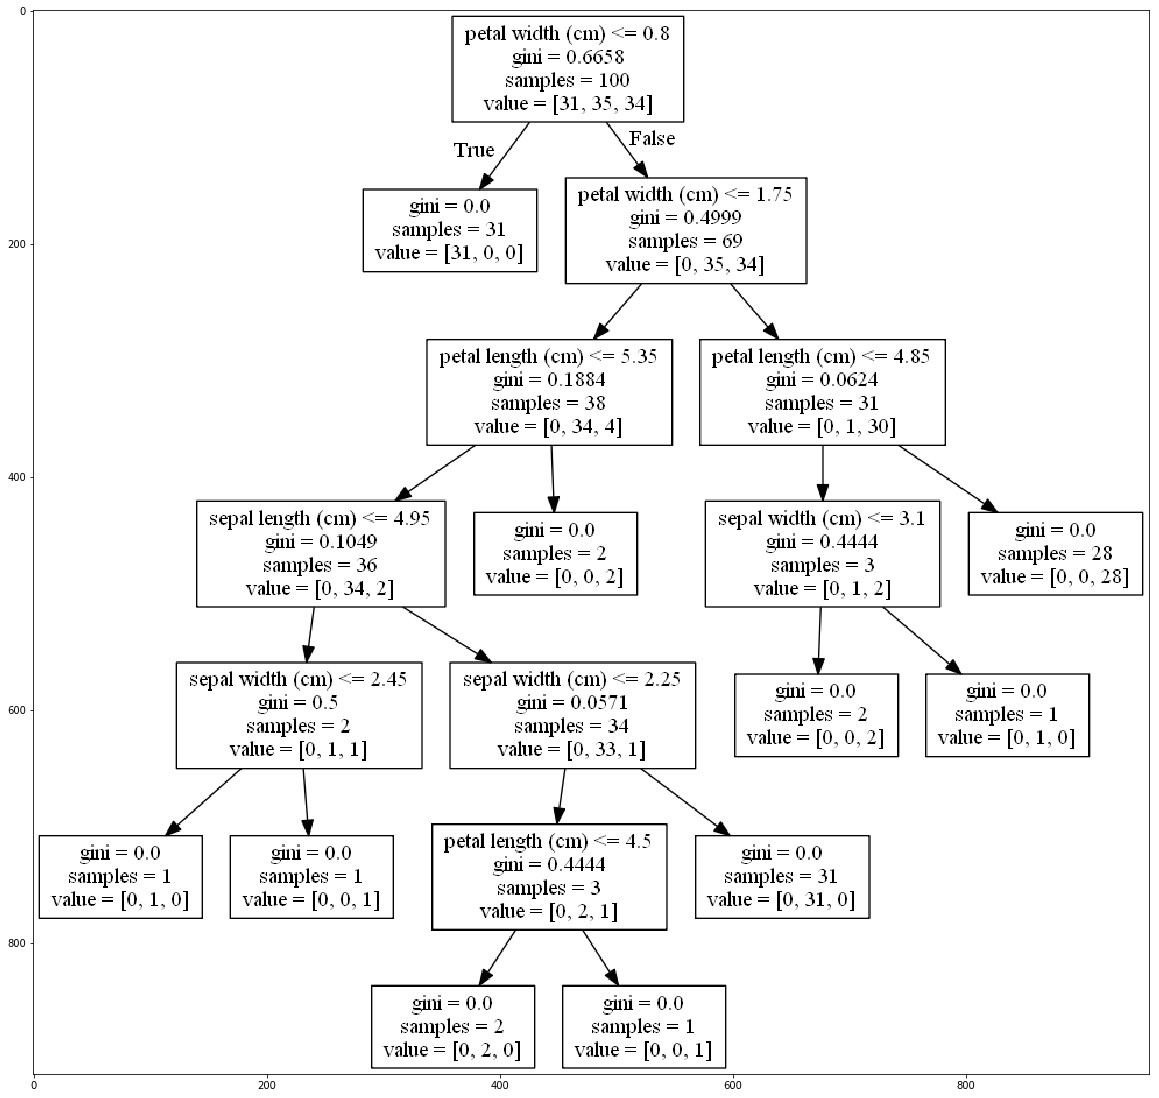

In [40]:
import pydotplus
import io
from sklearn.tree import export_graphviz
from scipy import misc
from matplotlib import pyplot as plt
f = io.StringIO()
dot_data = export_graphviz(clf, out_file = f,
                feature_names=iris.feature_names)
pydot_graph = pydotplus.graph_from_dot_data(f.getvalue())
pydot_graph.write_png("decision_tree.png")
img = misc.imread("decision_tree.png")
plt.rcParams["figure.figsize"]=(20,20)
plt.imshow(img)


#### f.getvalue()

#### Predict based on the Classifier

In [41]:
pred_y_test = clf.predict(X_test)
pred_y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1,
       1, 2, 1, 2])

#### Let us see the classification accuracy of our model

In [42]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, pred_y_test)
score

0.97999999999999998

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_y_test)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]])

## Classification Tree on Unbalanced Dataset

In [44]:
import os
import pandas as pd


#### Set the working directory and load files

In [45]:
CTDF_dev = pd.read_csv("DEV_SAMPLE.csv")
CTDF_holdout = pd.read_csv("HOLDOUT_SAMPLE.csv")

In [46]:
print( len(CTDF_dev),  len(CTDF_holdout))
CTDF_dev.head()

14000 6000


,Cust_ID,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period
0,C16505,0,41,M,91519.92,SELF-EMP,38,41-45,926,15
1,C17241,0,52,M,117288.96,SAL,17,>50,768,13
2,C18802,0,31,F,259827.44,SENP,8,31-35,816,5
3,C19289,0,45,F,26677.55,PROF,14,41-45,353,18
4,C14028,0,39,F,43440.31,SENP,1,36-40,751,31


In [47]:
import numpy as np
import matplotlib.pyplot as plt


#### Data Preprocessing
#### Splitting into features and response variables

In [48]:
X =  CTDF_dev[['Age', 'Gender', 'Balance', 'Occupation',
               'No_OF_CR_TXNS', 'AGE_BKT', 'SCR', 'Holding_Period']]

#### Categorical Variable to Numerical Variables

In [49]:
X_train = pd.get_dummies(X)
X_train.columns


y_train = CTDF_dev["Target"]



In [50]:
print (type(X_train) , type(y_train))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


#### Decision Tree
#### Loading the library

In [51]:
from sklearn.tree import DecisionTreeClassifier

#### Setting the parameter

In [52]:
clf = DecisionTreeClassifier(criterion = "gini" , 
                             min_samples_split = 100,
                             min_samples_leaf = 10,
                             max_depth = 50)

In [53]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=100, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [54]:
import pydot
from sklearn.tree import tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
dot_data = StringIO()
feature_list = list(X_train.columns.values)
export_graphviz(clf, 
                out_file = dot_data, 
                feature_names = feature_list)
graph=pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf("classification_tree_output.pdf")

In [55]:
Nodes = pd.DataFrame(clf.tree_.__getstate__()["nodes"])
Nodes


,left_child,right_child,feature,threshold,impurity,n_node_samples,weighted_n_node_samples
0,1,194,4,10.500000,0.160865,14000,14000.0
1,2,159,10,0.500000,0.274723,4818,4818.0
2,3,112,2,20.500000,0.237183,3971,3971.0
3,4,13,1,10853.500000,0.198811,2832,2832.0
4,5,6,3,368.000000,0.327605,281,281.0
5,-1,-1,-2,-2.000000,0.166997,87,87.0
6,7,12,15,0.500000,0.382612,194,194.0
7,8,11,13,0.500000,0.351867,158,158.0
8,9,10,1,6456.080078,0.308390,126,126.0
9,-1,-1,-2,-2.000000,0.385063,73,73.0


In [56]:
feature_importance = pd.DataFrame([X_train.columns,
                               clf.tree_.compute_feature_importances()])
feature_importance.T 


,0,1
0,Age,0.0538809
1,Balance,0.139184
2,No_OF_CR_TXNS,0.127342
3,SCR,0.16924
4,Holding_Period,0.228603
5,Gender_F,0.0362634
6,Gender_M,0.00127238
7,Gender_O,0.000932508
8,Occupation_PROF,0.0112383
9,Occupation_SAL,0.0159311


#### Let us see how good is the model

In [57]:
pred_y_train = clf.predict(X_train )
pred_y_train


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Let us see the classification accuracy of our model

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
score = accuracy_score(y_train, pred_y_train)
score

0.91707142857142854

In [59]:
y_train_prob = clf.predict_proba(X_train)

#### AUC

In [60]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob[:,1])
auc(fpr, tpr)


0.87865288277187581

#### Let us see how good is the model

In [61]:
X_holdout =  CTDF_holdout[['Age', 'Gender', 'Balance', 'Occupation',
               'No_OF_CR_TXNS', 'AGE_BKT', 'SCR', 'Holding_Period']]

In [62]:
X_test = pd.get_dummies(X_holdout)

In [63]:
y_test = CTDF_holdout["Target"]

In [64]:
pred_y_test = clf.predict(X_test)
score_h = accuracy_score(y_test, pred_y_test)
score_h

0.91883333333333328

In [65]:
y_test_prob = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
auc(fpr, tpr)

0.72973555435847348

#### Cross validation function

In [66]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(clf, X_train , y_train, cv = 10, scoring='roc_auc')
scores.mean()
scores.std()

0.03117549855248751

In [67]:
y_train_prob = clf.predict_proba(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob[:,1])
auc(fpr, tpr)

0.87865288277187581

In [68]:

y_test_prob = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
auc(fpr, tpr)


0.72973555435847348

#### Tuning the Classifier using GridSearchCV

In [69]:
from sklearn.grid_search import GridSearchCV

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [70]:
param_dist = {"criterion": ["gini","entropy"],
              "max_depth": np.arange(3,10),
              }

In [71]:
tree = DecisionTreeClassifier(min_samples_split = 100,
                             min_samples_leaf = 10)

In [72]:
tree_cv  = GridSearchCV(tree, param_dist, cv = 10, 
                        scoring = 'roc_auc', verbose = 100)


In [73]:
tree_cv.fit(X_train,y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits
[CV] criterion=gini, max_depth=3 .....................................
[CV] ............ criterion=gini, max_depth=3, score=0.738270 -   0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] criterion=gini, max_depth=3 .....................................
[CV] ............ criterion=gini, max_depth=3, score=0.727467 -   0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[CV] criterion=gini, max_depth=3 .....................................
[CV] ............ criterion=gini, max_depth=3, score=0.700211 -   0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[CV] criterion=gini, max_depth=3 .....................................
[CV] ............ criterion=gini, max_depth=3, score=0.761263 -   0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[CV] criterion=gini, max_depth=3 ................

[CV] ............ criterion=gini, max_depth=7, score=0.757537 -   0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    2.1s remaining:    0.0s
[CV] criterion=gini, max_depth=7 .....................................
[CV] ............ criterion=gini, max_depth=7, score=0.727947 -   0.0s
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    2.1s remaining:    0.0s
[CV] criterion=gini, max_depth=7 .....................................
[CV] ............ criterion=gini, max_depth=7, score=0.717884 -   0.0s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    2.2s remaining:    0.0s
[CV] criterion=gini, max_depth=7 .....................................
[CV] ............ criterion=gini, max_depth=7, score=0.773575 -   0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    2.3s remaining:    0.0s
[CV] criterion=gini, max_depth=7 .....................................
[CV] ............ criterion=gini, max_depth=7, score=0.800376 -   0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45

[CV] ......... criterion=entropy, max_depth=3, score=0.736394 -   0.0s
[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed:    4.5s remaining:    0.0s
[CV] criterion=entropy, max_depth=3 ..................................
[CV] ......... criterion=entropy, max_depth=3, score=0.739114 -   0.0s
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    4.6s remaining:    0.0s
[CV] criterion=entropy, max_depth=4 ..................................
[CV] ......... criterion=entropy, max_depth=4, score=0.758478 -   0.0s
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    4.6s remaining:    0.0s
[CV] criterion=entropy, max_depth=4 ..................................
[CV] ......... criterion=entropy, max_depth=4, score=0.739255 -   0.0s
[Parallel(n_jobs=1)]: Done  82 out of  82 | elapsed:    4.7s remaining:    0.0s
[CV] criterion=entropy, max_depth=4 ..................................
[CV] ......... criterion=entropy, max_depth=4, score=0.718329 -   0.0s
[Parallel(n_jobs=1)]: Done  83 out of  83

[CV] ......... criterion=entropy, max_depth=8, score=0.747015 -   0.0s
[CV] criterion=entropy, max_depth=8 ..................................
[CV] ......... criterion=entropy, max_depth=8, score=0.730127 -   0.0s
[CV] criterion=entropy, max_depth=8 ..................................
[CV] ......... criterion=entropy, max_depth=8, score=0.767726 -   0.0s
[CV] criterion=entropy, max_depth=8 ..................................
[CV] ......... criterion=entropy, max_depth=8, score=0.775528 -   0.0s
[CV] criterion=entropy, max_depth=8 ..................................
[CV] ......... criterion=entropy, max_depth=8, score=0.760217 -   0.0s
[CV] criterion=entropy, max_depth=9 ..................................
[CV] ......... criterion=entropy, max_depth=9, score=0.711761 -   0.0s
[CV] criterion=entropy, max_depth=9 ..................................
[CV] ......... criterion=entropy, max_depth=9, score=0.706873 -   0.0s
[CV] criterion=entropy, max_depth=9 ..................................
[CV] .

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=100, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': array([3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=100)

In [74]:
tree_cv.fit(X_train,y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits
[CV] criterion=gini, max_depth=3 .....................................
[CV] ............ criterion=gini, max_depth=3, score=0.738270 -   0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] criterion=gini, max_depth=3 .....................................
[CV] ............ criterion=gini, max_depth=3, score=0.727467 -   0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[CV] criterion=gini, max_depth=3 .....................................
[CV] ............ criterion=gini, max_depth=3, score=0.700211 -   0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[CV] criterion=gini, max_depth=3 .....................................
[CV] ............ criterion=gini, max_depth=3, score=0.761263 -   0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[CV] criterion=gini, max_depth=3 ................

[CV] ............ criterion=gini, max_depth=6, score=0.774119 -   0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    1.9s remaining:    0.0s
[CV] criterion=gini, max_depth=6 .....................................
[CV] ............ criterion=gini, max_depth=6, score=0.789969 -   0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    2.0s remaining:    0.0s
[CV] criterion=gini, max_depth=6 .....................................
[CV] ............ criterion=gini, max_depth=6, score=0.765658 -   0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    2.1s remaining:    0.0s
[CV] criterion=gini, max_depth=7 .....................................
[CV] ............ criterion=gini, max_depth=7, score=0.757537 -   0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    2.1s remaining:    0.0s
[CV] criterion=gini, max_depth=7 .....................................
[CV] ............ criterion=gini, max_depth=7, score=0.727947 -   0.0s
[Parallel(n_jobs=1)]: Done  42 out of  42

[CV] ......... criterion=entropy, max_depth=3, score=0.759510 -   0.0s
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:    4.5s remaining:    0.0s
[CV] criterion=entropy, max_depth=3 ..................................
[CV] ......... criterion=entropy, max_depth=3, score=0.739321 -   0.0s
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:    4.6s remaining:    0.0s
[CV] criterion=entropy, max_depth=3 ..................................
[CV] ......... criterion=entropy, max_depth=3, score=0.758022 -   0.0s
[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed:    4.6s remaining:    0.0s
[CV] criterion=entropy, max_depth=3 ..................................
[CV] ......... criterion=entropy, max_depth=3, score=0.736394 -   0.0s
[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed:    4.6s remaining:    0.0s
[CV] criterion=entropy, max_depth=3 ..................................
[CV] ......... criterion=entropy, max_depth=3, score=0.739114 -   0.0s
[Parallel(n_jobs=1)]: Done  80 out of  80

[CV] ......... criterion=entropy, max_depth=8, score=0.714925 -   0.0s
[CV] criterion=entropy, max_depth=8 ..................................
[CV] ......... criterion=entropy, max_depth=8, score=0.708525 -   0.0s
[CV] criterion=entropy, max_depth=8 ..................................
[CV] ......... criterion=entropy, max_depth=8, score=0.748086 -   0.0s
[CV] criterion=entropy, max_depth=8 ..................................
[CV] ......... criterion=entropy, max_depth=8, score=0.783092 -   0.0s
[CV] criterion=entropy, max_depth=8 ..................................
[CV] ......... criterion=entropy, max_depth=8, score=0.747015 -   0.0s
[CV] criterion=entropy, max_depth=8 ..................................
[CV] ......... criterion=entropy, max_depth=8, score=0.730127 -   0.0s
[CV] criterion=entropy, max_depth=8 ..................................
[CV] ......... criterion=entropy, max_depth=8, score=0.767649 -   0.0s
[CV] criterion=entropy, max_depth=8 ..................................
[CV] .

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=100, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': array([3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=100)

#### Building the model using best combination of parameters

In [75]:
print("Tuned Decision Tree parameter : {}".format(tree_cv.best_params_))

Tuned Decision Tree parameter : {'criterion': 'gini', 'max_depth': 5}


In [76]:
classifier = tree_cv.best_estimator_

In [77]:

classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=100, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

#### predicting probabilities

In [78]:
y_train_prob = classifier.predict_proba(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob[:,1])
auc_d = auc(fpr, tpr)

In [79]:
y_test_prob = classifier.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
auc_h = auc(fpr, tpr)

#### Rank Ordering

In [80]:
Prediction = classifier.predict_proba(X_train)
CTDF_dev["prob_score"] = Prediction[:,1]
CTDF_dev["prob_score"] 

0        0.200472
1        0.052023
2        0.139335
3        0.034361
4        0.002838
5        0.079728
6        0.157534
7        0.002838
8        0.079728
9        0.357143
10       0.157534
11       0.019608
12       0.019608
13       0.157534
14       0.126984
15       0.034361
16       0.002838
17       0.072874
18       0.079728
19       0.019608
20       0.052023
21       0.002838
22       0.157534
23       0.039831
24       0.157534
25       0.079728
26       0.034361
27       0.052023
28       0.072874
29       0.178947
           ...   
13970    0.079728
13971    0.034361
13972    0.157534
13973    0.079728
13974    0.019608
13975    0.002838
13976    0.139335
13977    0.261745
13978    0.002838
13979    0.002838
13980    0.019608
13981    0.139335
13982    0.139335
13983    0.034361
13984    0.011494
13985    0.019608
13986    0.139335
13987    0.019608
13988    0.333333
13989    0.200472
13990    0.039831
13991    0.052023
13992    0.139335
13993    0.034361
13994    0

#### scoring step
#### decile code

In [81]:
def deciles(x):
    decile = pd.Series(index=[0,1,2,3,4,5,6,7,8,9])
    for i in np.arange(0.1,1.1,0.1):
        decile[int(i*10)]=x.quantile(i)
    def z(x):
        if x<decile[1]: return(1)
        elif x<decile[2]: return(2)
        elif x<decile[3]: return(3)
        elif x<decile[4]: return(4)
        elif x<decile[5]: return(5)
        elif x<decile[6]: return(6)
        elif x<decile[7]: return(7)
        elif x<decile[8]: return(8)
        elif x<decile[9]: return(9)
        elif x<=decile[10]: return(10)
        else:return(np.NaN)
    s=x.map(z)
    return(s) 

In [82]:
def Rank_Ordering(X,y,Target):
    X['decile']=deciles(X[y])
    Rank=X.groupby('decile').apply(lambda x: pd.Series([
        np.min(x[y]),
        np.max(x[y]),
        np.mean(x[y]),
        np.size(x[y]),
        np.sum(x[Target]),
        np.size(x[Target][x[Target]==0]),
        ],
        index=(["min_resp","max_resp","avg_resp",
                "cnt","cnt_resp","cnt_non_resp"])
        )).reset_index()
    Rank = Rank.sort_values(by='decile',ascending=False)
    Rank["rrate"] = Rank["cnt_resp"]*100/Rank["cnt"]
    Rank["cum_resp"] = np.cumsum(Rank["cnt_resp"])
    Rank["cum_non_resp"] = np.cumsum(Rank["cnt_non_resp"])
    Rank["cum_resp_pct"] = Rank["cum_resp"]/np.sum(Rank["cnt_resp"])
    Rank["cum_non_resp_pct"]=Rank["cum_non_resp"]/np.sum(Rank["cnt_non_resp"])
    Rank["KS"] = Rank["cum_resp_pct"] - Rank["cum_non_resp_pct"]
    Rank
    return(Rank)

In [83]:
Rank = Rank_Ordering(CTDF_dev,"prob_score","Target")
Rank

,decile,min_resp,max_resp,avg_resp,cnt,cnt_resp,cnt_non_resp,rrate,cum_resp,cum_non_resp,cum_resp_pct,cum_non_resp_pct,KS
9,10,0.194915,0.727273,0.325106,1418.0,461.0,957.0,32.510578,461.0,957.0,0.373279,0.074971,0.298309
8,9,0.139335,0.178947,0.150244,2050.0,308.0,1742.0,15.024390,769.0,2699.0,0.622672,0.211438,0.411235
7,8,0.082495,0.126984,0.101610,994.0,101.0,893.0,10.160966,870.0,3592.0,0.704453,0.281394,0.423059
6,7,0.079728,0.079728,0.079728,1618.0,129.0,1489.0,7.972806,999.0,5081.0,0.808907,0.398042,0.410865
5,6,0.052023,0.072874,0.055181,1631.0,90.0,1541.0,5.518087,1089.0,6622.0,0.881781,0.518762,0.363019
4,5,0.039831,0.041322,0.039969,1301.0,52.0,1249.0,3.996925,1141.0,7871.0,0.923887,0.616608,0.307279
3,4,0.034361,0.034361,0.034361,1135.0,39.0,1096.0,3.436123,1180.0,8967.0,0.955466,0.702468,0.252998
2,3,0.019608,0.019608,0.019608,2448.0,48.0,2400.0,1.960784,1228.0,11367.0,0.994332,0.890482,0.103850
1,2,0.011494,0.011494,0.011494,348.0,4.0,344.0,1.149425,1232.0,11711.0,0.997571,0.917430,0.080140
0,1,0.002838,0.002838,0.002838,1057.0,3.0,1054.0,0.283822,1235.0,12765.0,1.000000,1.000000,0.000000


#### Let us see the Rank Ordering on Hold-Out Dataset

In [84]:
Prediction_h = classifier.predict_proba(X_test)
CTDF_holdout["prob_score"] = Prediction_h[:,1]

In [85]:
Rank_h = Rank_Ordering(CTDF_holdout,"prob_score","Target")
Rank_h

,decile,min_resp,max_resp,avg_resp,cnt,cnt_resp,cnt_non_resp,rrate,cum_resp,cum_non_resp,cum_resp_pct,cum_non_resp_pct,KS
9,10,0.194915,0.701149,0.316748,637.0,154.0,483.0,24.175824,154.0,483.0,0.309237,0.087786,0.221451
8,9,0.139335,0.178947,0.150148,829.0,128.0,701.0,15.440290,282.0,1184.0,0.566265,0.215194,0.351071
7,8,0.082495,0.126984,0.100912,381.0,41.0,340.0,10.761155,323.0,1524.0,0.648594,0.276990,0.371604
6,7,0.079728,0.079728,0.079728,666.0,62.0,604.0,9.309309,385.0,2128.0,0.773092,0.386768,0.386324
5,6,0.052023,0.072874,0.054803,720.0,47.0,673.0,6.527778,432.0,2801.0,0.867470,0.509088,0.358382
4,5,0.039831,0.041322,0.039973,587.0,22.0,565.0,3.747871,454.0,3366.0,0.911647,0.611778,0.299869
3,4,0.034361,0.034361,0.034361,480.0,8.0,472.0,1.666667,462.0,3838.0,0.927711,0.697565,0.230146
2,3,0.019608,0.019608,0.019608,1079.0,25.0,1054.0,2.316960,487.0,4892.0,0.977912,0.889131,0.088780
1,2,0.011494,0.011494,0.011494,163.0,6.0,157.0,3.680982,493.0,5049.0,0.989960,0.917666,0.072294
0,1,0.002838,0.002838,0.002838,458.0,5.0,453.0,1.091703,498.0,5502.0,1.000000,1.000000,0.000000


In [86]:
def gini(list_of_values):
    sorted_list = sorted(list_of_values)
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(list_of_values) / 2.
    return (fair_area - area) / fair_area

gini(CTDF_dev["prob_score"])

0.5229390977443534

In [87]:
CTDF_dev.head()

,Cust_ID,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period,prob_score,decile
0,C16505,0,41,M,91519.92,SELF-EMP,38,41-45,926,15,0.200472,10
1,C17241,0,52,M,117288.96,SAL,17,>50,768,13,0.052023,6
2,C18802,0,31,F,259827.44,SENP,8,31-35,816,5,0.139335,9
3,C19289,0,45,F,26677.55,PROF,14,41-45,353,18,0.034361,4
4,C14028,0,39,F,43440.31,SENP,1,36-40,751,31,0.002838,1
